In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = "project3-alishba123"

In [ ]:
# Add imports for any visualization libraries you may need
import matplotlib.pyplot as plt

%matplotlib inline

Question Number 1

In [ ]:
%%bigquery --project $project_id a
# Question No 1
SELECT
  COUNT(*) repositories,
  extract (year from created_timestamp) Year,
  ROUND(AVG(size),2) avg_size,
  ROUND(AVG(stars_count),2) avg_stars
FROM
  `bigquery-public-data.libraries_io.repositories`
Where extract (year from created_timestamp) >=2007 AND extract (year from created_timestamp) <=2018
GROUP BY
  Year
ORDER BY
  repositories DESC
LIMIT
  1000;

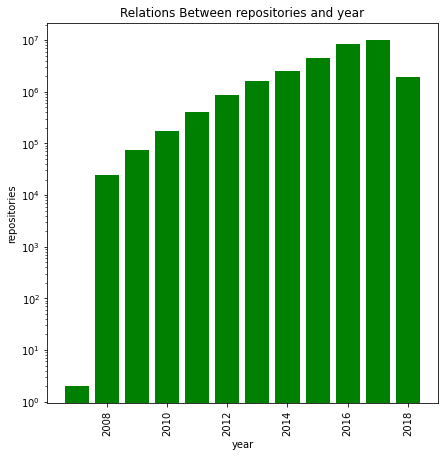

In [ ]:
%matplotlib inline
plt.figure(figsize=(7,7))
plt.bar(a["Year"], a ["repositories"],color='green')
plt.title("Relations Between repositories and year")
plt.ylabel("repositories")
plt.xlabel("year")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

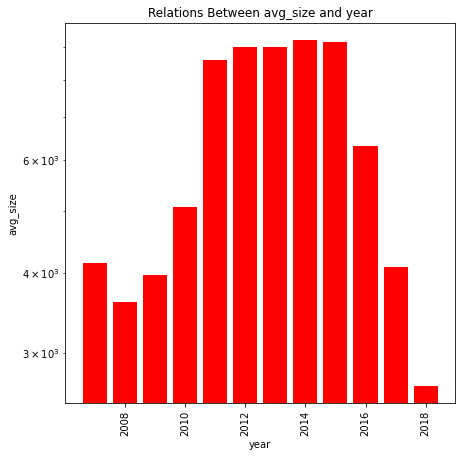

In [ ]:
%matplotlib inline
plt.figure(figsize=(7,7))
plt.bar(a["Year"], a ["avg_size"],color='red')
plt.title("Relations Between avg_size and year")
plt.ylabel("avg_size")
plt.xlabel("year")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

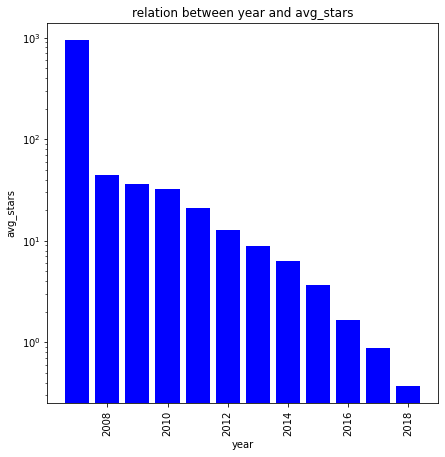

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,7))
plt.bar(a["Year"], a["avg_stars"],color='blue')
plt.title("relation between year and avg_stars")
plt.ylabel("avg_stars")
plt.xlabel("year")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

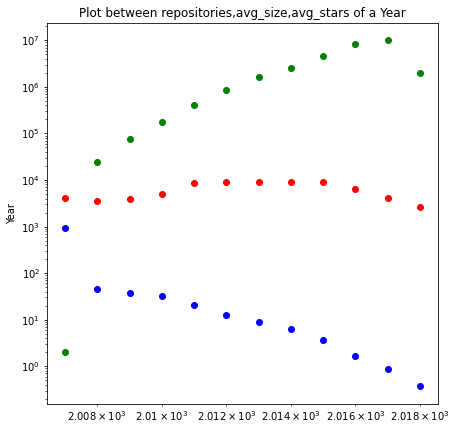

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,7))
plt.yscale("log")
plt.xscale("log")
plt.plot(a["Year"], a["repositories"],'go')
plt.plot(a["Year"], a["avg_size"],'ro')
plt.plot(a["Year"], a["avg_stars"],'bo')
plt.title("Plot between repositories,avg_size,avg_stars of a Year")
plt.ylabel("Year")
plt.show()

Question Number 2

In [ ]:
%%bigquery --project $project_id b
# Question No 2
SELECT a.project_id,COUNT(*) dependencies,
 FROM `bigquery-public-data.libraries_io.dependencies` a
JOIN `bigquery-public-data.libraries_io.projects` b
on a.project_id= b.id
join `bigquery-public-data.libraries_io.tags` c
on b.repository_id=c.repository_id
Where extract (year from created_timestamp) >=2007 AND extract (year from created_timestamp) <=2018
GROUP BY
  a.project_id
ORDER BY
  a.project_id

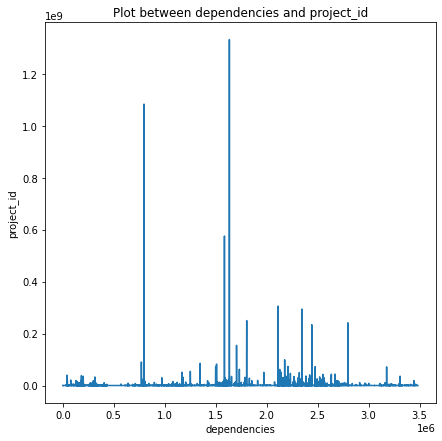

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,7))
plt.plot(b["project_id"], b["dependencies"])
plt.title("Plot between dependencies and project_id")
plt.ylabel("project_id")
plt.xlabel("dependencies")
plt.show()

Question Number 3


In [ ]:
%%bigquery --project $project_id c
# Question No 3
SELECT
  name,
  repository_sourcerank,
  LANGUAGE,
  status
FROM
  `bigquery-public-data.libraries_io.projects_with_repository_fields`
WHERE
  status IN ('Deprecated')
ORDER BY
  repository_sourcerank DESC
LIMIT
  50;

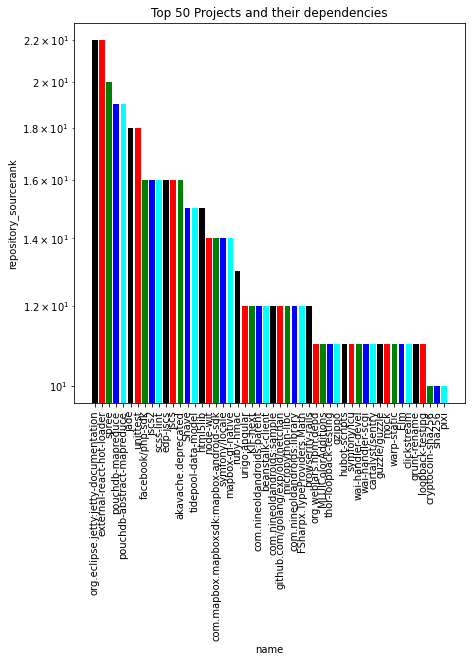

In [ ]:
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.bar(c["name"], c["repository_sourcerank"],color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Top 50 Projects and their dependencies")
plt.ylabel("repository_sourcerank")
plt.xlabel("name")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

Question Number 5


In [ ]:
#Question4
# Run this cell to create a dataset to store your model, or create in the UI
model_dataset_name = 'libraries_data'
dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('project3-alishba123', 'libraries_data'))

Question Number 5 Model 1 ---> Logistic Regression


In [ ]:
# Question No 5
# Model 1
a.to_gbq(
    'num_of_repositories.projects',
     project_id='project3-alishba123',
      chunksize=None, 
      reauth=False,
      if_exists='replace',
      auth_local_webserver=False,
      table_schema=None,
      location='US',
      progress_bar=True,
      credentials=None)

1it [00:03,  3.03s/it]


In [ ]:
%unload_ext google.colab.data_table

The google.colab.data_table extension is not loaded.


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `num_of_repositories.libraries_prediction`
OPTIONS ( MODEL_TYPE='Logistic_REG') AS
SELECT repositories as label , Year,avg_size,avg_stars from (
SELECT repositories ,Year,avg_size,avg_stars FROM `project3-alishba123.num_of_repositories.projects` )

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project $project_id
SELECT *
FROM
  ML.TRAINING_INFO(MODEL `num_of_repositories.libraries_prediction`)

training_run  iteration      loss eval_loss  learning_rate  duration_ms
0              0         19  0.068126      None           12.8         2677
1              0         18  0.069565      None            6.4         3393
2              0         17  0.070346      None            3.2         3147
3              0         16  0.071544      None           12.8         2576
4              0         15  0.072550      None            6.4         3369
5              0         14  0.073474      None            3.2         3512
6              0         13  0.076310      None            6.4         3054
7              0         12  0.077175      None           25.6         2910
8              0         11  0.079756      None           12.8         2754
9              0         10  0.082648      None            6.4         3036
10             0          9  0.084305      None            3.2         2761
11             0          8  0.087276      None            6.4         2934
12             0          7  0.091328      None           25.6         2964
13             0          6  0.101191      None           12.8         2737
14             0          5  0.118306      None            6.4         2846
15             0          4  0.139856      None            3.2         2655
16             0          3  0.162124      None            1.6         3205
17             0          2  0.181598      None            0.8         2789
18             0          1  0.195170      None            0.4         3121
19             0          0  0.202953      None            0.2         2257

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
  *
FROM
  ML.EVALUATE(MODEL `num_of_repositories.libraries_prediction`, (
SELECT repositories as label , Year,avg_size,avg_stars from (
SELECT repositories ,Year,avg_size,avg_stars FROM `project3-alishba123.num_of_repositories.projects` )))

precision    recall  accuracy  f1_score  log_loss  roc_auc
0      0.875  0.916667  0.916667  0.888889  0.817514      1.0

Question Number 5 Model 2 ---> Linear Regression


In [ ]:
# Question No 5
# Model 2
%%bigquery --project $project_id a2
SELECT
  COUNT(*) repositories,
  extract (year from created_timestamp) Year,
  ROUND(AVG(size),2) avg_size,
  ROUND(AVG(stars_count),2) avg_stars
FROM
  `bigquery-public-data.libraries_io.repositories`
Where extract (year from created_timestamp) >=2007 AND extract (year from created_timestamp) <=2018
GROUP BY
  Year
ORDER BY
  repositories DESC
LIMIT
  1000;

In [ ]:
a2.to_gbq(
    'num_of_repositories.projects2',
     project_id='project3-alishba123',
      chunksize=None, 
      reauth=False,
      if_exists='replace',
      auth_local_webserver=False,
      table_schema=None,
      location='US',
      progress_bar=True,
      credentials=None)

1it [00:05,  5.12s/it]


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `num_of_repositories.libraries_2prediction`
OPTIONS ( MODEL_TYPE='Linear_REG') AS
SELECT repositories as label , Year,avg_size,avg_stars from (
SELECT repositories ,Year,avg_size,avg_stars FROM `project3-alishba123.num_of_repositories.projects2` )

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project $project_id
SELECT *
FROM
  ML.TRAINING_INFO(MODEL `num_of_repositories.libraries_2prediction`)

training_run  iteration          loss eval_loss  learning_rate  duration_ms
0             0          4  4.900731e+12      None            0.8         2364
1             0          3  4.905094e+12      None            0.8         2266
2             0          2  5.014176e+12      None            0.8         2194
3             0          1  7.741219e+12      None            0.4         2606
4             0          0  1.279130e+13      None            0.2         2171

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
  *
FROM
  ML.EVALUATE(MODEL `num_of_repositories.libraries_2prediction`, (
SELECT repositories as label , Year from (
SELECT repositories ,Year FROM `project3-alishba123.num_of_repositories.projects2` )))

mean_absolute_error  mean_squared_error  ...  r2_score  explained_variance
0         1.661124e+06        4.900731e+12  ...  0.541232            0.541241

[1 rows x 6 columns]

Question Number 5 Model 1 ---> Logistic Regression Prediction

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
  *
FROM
  ML.PREDICT(MODEL `num_of_repositories.libraries_prediction`, (
SELECT repositories as label , Year,avg_size,avg_stars from (
SELECT repositories ,Year,avg_size,avg_stars FROM `project3-alishba123.num_of_repositories.projects` )))

predicted_label  ... avg_stars
0            859353  ...     12.86
1            410991  ...     20.87
2           8522437  ...      1.64
3           1618265  ...      8.83
4             24256  ...     44.44
5            173450  ...     32.61
6             24256  ...     36.53
7                 2  ...    941.50
8           1948370  ...      0.37
9           9964450  ...      0.87
10          2501690  ...      6.33
11          4606377  ...      3.64

[12 rows x 6 columns]

Question Number 4


In [ ]:
%%bigquery --project $project_id d
# Question No 4
SELECT
  dependency_platform,
  COUNT(*) dependencies,
  APPROX_TOP_COUNT(dependency_name, 3) top_dependencies
FROM
  `bigquery-public-data.libraries_io.dependencies`
GROUP BY
  dependency_platform
ORDER BY
  dependencies DESC;

In [ ]:
d.to_gbq(
    'top_dependencies.projects',
     project_id='project3-alishba123',
      chunksize=None, 
      reauth=False,
      if_exists='replace',
      auth_local_webserver=False,
      table_schema=None,
      location='US',
      progress_bar=True,
      credentials=None)

1it [00:05,  5.45s/it]


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `num_of_repositories.top_dependencies`
OPTIONS ( MODEL_TYPE='Linear_REG') AS
SELECT dependencies as label , dependency_platform,top_dependencies from (
SELECT dependencies, dependency_platform,top_dependencies FROM `project3-alishba123.top_dependencies.projects` )

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
  *
FROM
  ML.EVALUATE(MODEL `num_of_repositories.top_dependencies`, (
SELECT dependencies as label , dependency_platform,top_dependencies from (
SELECT dependencies, dependency_platform,top_dependencies FROM `project3-alishba123.top_dependencies.projects` )))

mean_absolute_error  mean_squared_error  ...  r2_score  explained_variance
0         3.907994e-07        3.663739e-13  ...       1.0                 1.0

[1 rows x 6 columns]

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
  *
FROM
  ML.PREDICT(MODEL `num_of_repositories.top_dependencies`, (
SELECT dependencies as label , dependency_platform,top_dependencies from (
SELECT dependencies, dependency_platform,top_dependencies FROM `project3-alishba123.top_dependencies.projects` )))

predicted_label  ...                                   top_dependencies
0      8.057190e+07  ...  [{'value': 'mocha', 'count': 1397571}, {'value...
1      6.024561e+06  ...  [{'value': 'phpunit/phpunit', 'count': 475912}...
2      5.519031e+06  ...  [{'value': 'junit:junit', 'count': 221430}, {'...
3      4.990248e+06  ...  [{'value': 'rake', 'count': 407916}, {'value':...
4      4.268765e+06  ...  [{'value': 'Newtonsoft.Json', 'count': 224135}...
5      2.421659e+06  ...  [{'value': 'Test-More', 'count': 140068}, {'va...
6      5.531580e+05  ...  [{'value': 'serde', 'count': 22870}, {'value':...
7      4.890080e+05  ...  [{'value': 'requests', 'count': 33460}, {'valu...
8      3.705620e+05  ...  [{'value': 'R', 'count': 49995}, {'value': 'st...
9      2.528780e+05  ...  [{'value': 'atom-space-pen-views', 'count': 12...
10     1.694360e+05  ...  [{'value': 'test', 'count': 12885}, {'value': ...
11     6.902600e+04  ...  [{'value': 'poison', 'count': 8209}, {'value':...
12     6.510100e+04  ...  [{'value': 'puppetlabs-stdlib', 'count': 18749...
13     1.913000e+04  ...  [{'value': 'elm-lang/core', 'count': 6370}, {'...
14     1.579900e+04  ...  [{'value': 'vibe-d', 'count': 660}, {'value': ...
15     6.275000e+03  ...  [{'value': 'openfl', 'count': 466}, {'value': ...
16     5.348000e+03  ...  [{'value': 'Pkg-config', 'count': 492}, {'valu...

[17 rows x 4 columns]